# P2: INVESTIGATE A DATASET
<p>
## PROJECT: TITANIC
***

## Introduction

The current project addresses the question of if, in life/death situations, common ethical standards as "women and children first" are respected and if people travelling with relatives are more prone to survive than solo travellers.

The reasons leading to a higher or lower survival rate (causations) are beyond the scope of this work.

To develop this work, the Titanic demographics information from 891 of the 2224 passengers and crew on board were used. The dataset was obtained in csv format from [this link](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv) and the variable descriptions could be found at [Kaggle](https://www.kaggle.com/c/titanic/data) website (dec. 26th 2016).<p>

***
## Question Statements


The project addresses the following questions to be answered: 

* Did gender influence survival rate?

* Did adulthood influence survival rate?

* Did family members' survival rate differ from those travelling solo?

* Did children presence in a family influence its members survival rate?

***
## Assumptions

* Data about the 891 passengers was randomly selected out of 2224 total passengers;

* To determine family relations:
    - Same surname
    - Same fare class
    - Coincidences were ignored


* Adults: > 10 years of age
* Children: <= 10 years of age

The childhood age limit was arbitrarily selected as the maximum age an individual could be perceived as a child worth saving above others using the "women and children first" criteria, not the legal age. 

***
## Special Notes

Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

###### Source: [Kaggle](https://www.kaggle.com/c/titanic/data) website.

***
## Step 1: Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('titanic-data.csv')

In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.describe()

/Users/Daniel/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The first important information to notice is that 'Age' has several missing values. As it's an important information in our analysis, we may either disconsider those missing cases or match with an external database to fill those gaps.

For this project, we will disconsider these rows in which 'age' is missing.

In [4]:
titanic_df_filtered = titanic_df[titanic_df['Age']>0]

In [5]:
titanic_df_filtered.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


All descriptive statistics, on an aggregated level, seem OK:

* `Age` range from 0.42 years to 80 years old;
* `Survived` is either 0 or 1 (boolean)
* `SibSp` (number of siblings and spouses aboard) range from 0 to 5
* `Parch` (number of parents and children aboard) range from 0 to 6
* All passengers belong to `Pclass` 1-3 (1st to 3rd class), which means the crew is not included in this dataset. This is good news, as crew members should be excluded from the analysis to avoid distorting the results (they usually don't bring relatives or children aboard and have a different level of commitment to the ship in a disaster situation than paying passengers).

For now, only numeric and boolean variables were analysed. We still need to check the consistency of string variable `Sex`



In [6]:
titanic_df_filtered_groupby_sex = titanic_df_filtered.groupby(['Sex'])

titanic_df_filtered_groupby_sex.count()  

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,261,261,261,261,261,261,261,261,261,90,259
male,453,453,453,453,453,453,453,453,453,95,453


Gender data seems ok. No sex or missing value other than 'male' and 'female'. <p>
The proportion is ok too (36.5% female passengers), in line with 35.5% female passengers in Encyclopedia Titanica ([female passengers](https://www.encyclopedia-titanica.org/titanic-female-passengers/); 
[male passengers](https://www.encyclopedia-titanica.org/titanic-male-passengers/))

***
## Step 2: Data Transformation

To accomplish our analysis, the first transformation is to split the surname from the given names and titles, as to aggregate family members together.

In [8]:
surname = titanic_df_filtered['Name'].str.split(pat=',', expand=True)

surname.rename(columns={0:'Surname', 1:'Given_Names'}, inplace=True)


titanic_df_new = pd.concat([titanic_df_filtered, surname], axis=1, join='inner')

titanic_df_new.sort_values(['Surname'])

titanic_df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Given_Names
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


To count how many males/females and children/adults survived in each family, it's necessary to create 3 new boolean columns:

In [9]:
titanic_df_new['Child']=0
titanic_df_new.loc[titanic_df_new['Age']<=10, 'Child'] = 1


titanic_df_new['Male']=0
titanic_df_new.loc[titanic_df_new['Sex']== 'male', 'Male'] = 1


titanic_df_new['Total_Passengers']= 1

titanic_df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Given_Names,Child,Male,Total_Passengers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,0,1,1


** According to our assumptions, family members are those with the same surname travelling on the same class (Pclass). 
Coincidences were ignored.**

In [11]:
# Qty of family members
titanic_df_new_groupby_family = titanic_df_new.groupby(["Surname", "Pclass"], as_index=False)['PassengerId'].count()

titanic_df_new_groupby_family.rename(columns={'PassengerId':'Qty_Family_Members'}, inplace=True)

titanic_df_new1 = pd.merge(titanic_df_new, titanic_df_new_groupby_family, on=['Surname', 'Pclass'], how='left')


# Presence of child in the family

titanic_df_new_groupby_family2 = titanic_df_new.groupby(["Surname", "Pclass"], as_index=False)['Child'].max()

titanic_df_new_groupby_family2.rename(columns={'Child':'Child_Presence'}, inplace=True)

titanic_df_new2 = pd.merge(titanic_df_new1, titanic_df_new_groupby_family2, on=['Surname', 'Pclass'], how='left')


# boolean: if travelling with family, 'solo_traveller' = 0; if travelling solo, 'solo_traveller' = 1.

titanic_df_new2['Solo_Traveller']=0
titanic_df_new2.loc[(titanic_df_new2['Qty_Family_Members']==1), 'Solo_Traveller'] = 1

titanic_df_new2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Given_Names,Child,Male,Total_Passengers,Qty_Family_Members,Child_Presence,Solo_Traveller
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,0,1,1,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,0,1,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,0,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,0,1,2,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,0,1,1,1,0,1


**Sanity check: any solo traveller has a sibling/spouse ('SibSp') or parent/child ('Parch') on board? Any family member does not have any of those?**

In [12]:
titanic_df_new2.groupby(['Solo_Traveller'])['SibSp', 'Parch'].sum()

,SibSp,Parch
Solo_Traveller,,
0,307,265
1,59,43


** Let's check those solo travellers with family members! **

** check #1: 'Parch' variable (parents/children)**

In [14]:
titanic_df_new2_filtered = titanic_df_new2[(titanic_df_new2['Parch']>0) & titanic_df_new2['Solo_Traveller']==1]

titanic_df_new2_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Given_Names,Child,Male,Total_Passengers,Qty_Family_Members,Child_Presence,Solo_Traveller
40,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,Ostby,Mr. Engelhart Cornelius,0,1,1,1,0,1
75,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,Greenfield,Mr. William Bertram,0,1,1,1,0,1
108,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,Newsom,Miss. Helen Monypeny,0,0,1,1,0,1
116,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S,Nicholls,Mr. Joseph Charles,0,1,1,1,0,1
124,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,van Billiard,Mr. Austin Blyler,0,1,1,1,0,1


- Except for 1 case with same ticket number for 2 different passengers, the remaining have nothing in common to link each other.
- Solution: change 'Parch' variable to 0 (zero). 
- Ignore if more than one ticket with same number, can't make assumptions.

In [15]:
titanic_df_new2.loc[(titanic_df_new2['Parch']>0) & (titanic_df_new2['Solo_Traveller']==1), 'Parch'] = 0

titanic_df_new2.groupby(['Solo_Traveller'])['SibSp', 'Parch'].sum()

,SibSp,Parch
Solo_Traveller,,
0,307,265
1,59,0


** check # 2: 'SibSp' variable (siblings/spouse)**

In [17]:
titanic_df_new2_filtered = titanic_df_new2[(titanic_df_new2['SibSp']>0) & titanic_df_new2['Solo_Traveller']==1]

titanic_df_new2_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Given_Names,Child,Male,Total_Passengers,Qty_Family_Members,Child_Presence,Solo_Traveller
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,0,1,1,0,1
26,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,Meyer,Mr. Edgar Joseph,0,1,1,1,0,1
31,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,Ahlin,Mrs. Johan (Johanna Persdotter Larsson),0,0,1,1,0,1
39,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,Faunthorpe,Mrs. Lizzie (Elizabeth Anne Wilkinson),0,0,1,1,0,1
52,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S,Kink,Mr. Vincenz,0,1,1,1,0,1


- Same as Parch. Except for 1 case with same ticket number for 2 different passengers, the remaining have nothing in common to link each other.
- Solution: change 'SibSp' variable to 0 (zero). 
- Ignore if more than one ticket with same number, can't make assumptions.

In [18]:
titanic_df_new2.loc[(titanic_df_new2['SibSp']>0) & (titanic_df_new2['Solo_Traveller']==1), 'SibSp'] = 0

titanic_df_new2.groupby(['Solo_Traveller'])['SibSp', 'Parch'].sum()

,SibSp,Parch
Solo_Traveller,,
0,307,265
1,0,0


In [21]:
titanic_df_new2_filtered = titanic_df_new2[(titanic_df_new2['Child']==0) & titanic_df_new2['Child_Presence']==1]

titanic_df_new2_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Given_Names,Child,Male,Total_Passengers,Qty_Family_Members,Child_Presence,Solo_Traveller
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),0,0,1,6,1,0
12,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mr. Anders Johan,0,1,1,9,1,0
22,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,Asplund,Mrs. Carl Oscar (Selma Augusta Emilia Johansson),0,0,1,4,1,0
44,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,Goodwin,Master. William Frederick,0,1,1,6,1,0
51,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Andersson,Miss. Erna Alexandra,0,0,1,9,1,0


***
## Step 3: Data Exploration

** Summary tables: **

In [22]:
titanic_df_new2.groupby(['Survived'])['Total_Passengers'].sum()

Survived
0    424
1    290
Name: Total_Passengers, dtype: int64

**Of total 714 passengers in our sample, 40.6% survived.**

In [23]:
titanic_df_new2.groupby(['Child', 'Sex', 'Survived'])['Total_Passengers'].sum()

Child  Sex     Survived
0      female  0            52
               1           178
       male    0           346
               1            74
1      female  0            12
               1            19
       male    0            14
               1            19
Name: Total_Passengers, dtype: int64

** Women and children seems to have had more chance of surviving.**

- 77.4% of women above 10 years old survived;
- 59.4% of children below or equal to 10 years old survived;
- 17.6% of men above 10 years old survived.

Will be statistically tested as part of this assignment.

Populating the interactive namespace from numpy and matplotlib


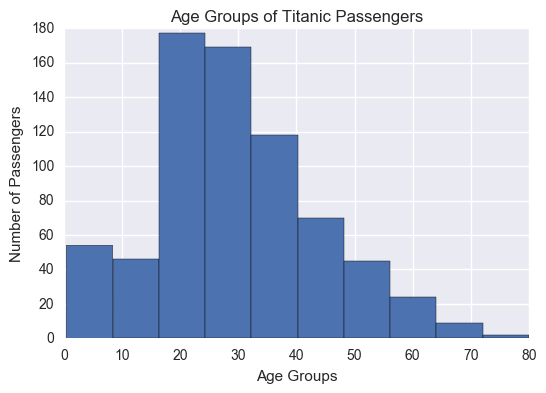

In [24]:
%pylab inline

titanic_df_new2['Age'].hist()

pyplot.title('Age Groups of Titanic Passengers')
pyplot.xlabel('Age Groups')
pyplot.ylabel('Number of Passengers')

** Most people aboard the Titanic were between 20-40 years old**

In [25]:
titanic_df_new2.groupby(['Solo_Traveller'])['Total_Passengers'].sum()

Solo_Traveller
0    272
1    442
Name: Total_Passengers, dtype: int64

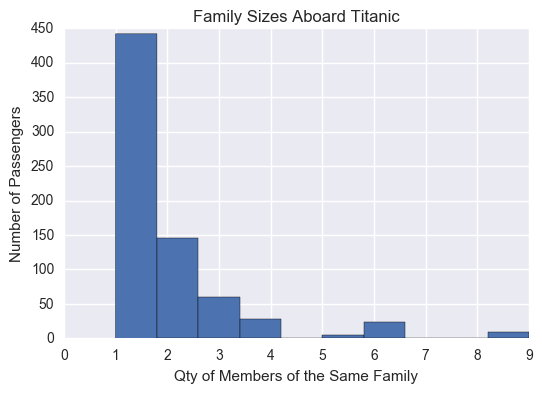

In [26]:
titanic_df_new2['Qty_Family_Members'].hist()


pyplot.title('Family Sizes Aboard Titanic')
pyplot.xlabel('Qty of Members of the Same Family')
pyplot.ylabel('Number of Passengers')

**Most people aboard were travelling solo (no family members by our criteria)** 
- 442 solo travellers out of 714 in our sample (61.9%)

***
**Solo travellers data exploration**

In [27]:
titanic_df_solo = titanic_df_new2[titanic_df_new2['Solo_Traveller']== 1]

In [28]:
titanic_df_solo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Child,Male,Total_Passengers,Qty_Family_Members,Child_Presence,Solo_Traveller
count,442.000000,442.000000,442.000000,442.000000,442.0,442.0,442.000000,442.000000,442.000000,442.0,442.0,442.000000,442.0
mean,457.595023,0.386878,2.219457,32.326742,0.0,0.0,29.300979,0.018100,0.696833,1.0,1.0,0.018100,1.0
std,261.353942,0.487587,0.843426,13.342693,0.0,0.0,53.819281,0.133463,0.460148,0.0,0.0,0.133463,0.0
min,2.000000,0.000000,1.000000,0.420000,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.000000,1.0
25%,222.250000,0.000000,1.000000,22.000000,0.0,0.0,7.895800,0.000000,0.000000,1.0,1.0,0.000000,1.0
50%,456.500000,0.000000,2.000000,30.000000,0.0,0.0,12.318750,0.000000,1.000000,1.0,1.0,0.000000,1.0
75%,694.750000,1.000000,3.000000,40.000000,0.0,0.0,26.550000,0.000000,1.000000,1.0,1.0,0.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,0.0,0.0,512.329200,1.000000,1.000000,1.0,1.0,1.000000,1.0


In [29]:
titanic_df_solo.groupby(['Survived'])['Total_Passengers'].sum()

Survived
0    271
1    171
Name: Total_Passengers, dtype: int64

**Of the total 442 solo passengers, 38.7% survived.**

In [30]:
titanic_df_solo.groupby(['Child', 'Sex', 'Survived'])['Total_Passengers'].sum()

Child  Sex     Survived
0      female  0            22
               1           106
       male    0           248
               1            58
1      female  0             1
               1             5
       male    1             2
Name: Total_Passengers, dtype: int64

** - Of all 8 children travelling solo (or with someone other than a family member), only 1 died.**<p>
** - Of all solo adult females, 82.8% survived.**<p>
** - Of all solo adult males, 19.0% survived. **

***
** Family travellers data exploration:**

In [31]:
titanic_df_families = titanic_df_new2[titanic_df_new2['Solo_Traveller']== 0]

In [32]:
titanic_df_families.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Child,Male,Total_Passengers,Qty_Family_Members,Child_Presence,Solo_Traveller
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.0,272.000000,272.000000,272.0
mean,433.937500,0.437500,2.264706,25.429228,1.128676,0.974265,43.459008,0.205882,0.533088,1.0,3.066176,0.393382,0.0
std,255.245876,0.496993,0.830554,15.359852,1.200394,1.111529,50.297252,0.405090,0.499824,0.0,1.644412,0.489401,0.0
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,0.000000,0.0
25%,223.750000,0.000000,2.000000,15.750000,0.000000,0.000000,14.500000,0.000000,0.000000,1.0,2.000000,0.000000,0.0
50%,430.000000,0.000000,3.000000,24.500000,1.000000,1.000000,26.250000,0.000000,1.000000,1.0,2.000000,0.000000,0.0
75%,645.250000,1.000000,3.000000,35.250000,1.000000,2.000000,52.138550,0.000000,1.000000,1.0,3.000000,1.000000,0.0
max,888.000000,1.000000,3.000000,74.000000,5.000000,6.000000,263.000000,1.000000,1.000000,1.0,9.000000,1.000000,0.0


In [33]:
titanic_df_families.groupby(['Survived'])['Total_Passengers'].sum()

Survived
0    153
1    119
Name: Total_Passengers, dtype: int64

Of total 272 passengers travelling with a family member, 43.8% survived. 

In [34]:
titanic_df_families.groupby(['Child', 'Sex', 'Survived'])['Total_Passengers'].sum()

Child  Sex     Survived
0      female  0           30
               1           72
       male    0           98
               1           16
1      female  0           11
               1           14
       male    0           14
               1           17
Name: Total_Passengers, dtype: int64

** - Of all 56 children travelling with family members, 31 survived (55.4%).**<p>
** - Of all adult females travelling with family members, 70.6% survived.**<p>
** - Of all adult males travelling with family members, 14.0% survived. **

## Step 4: Statistical Analysis

The most appropriate statistical test to draw conclusions about Titanic survivors is the **chi-square test of homogeneity** for a few reasons:<br>
1. The sampling method is a simple random sampling;
2. The variables are categorical;

Test restriction: the expected frequency count should be at least 5 in each population at each level of the categorical variable. If not, data must be re-grouped in a way the minimum value is respected or conclusions cannot be drawed from the data.

Chi-square test formula:
$$
\chi^2 = \sum\frac{(O_i - E_i)^2}{E_i}
$$

where:<br>
$O_i$ is the observed value;<br>
$E_i$ is the expected value.

***
### Graph Functions: 

Before stepping into statistical analysis, I'll define functions to create graphs from all results. <br>
This can be done because all tests have similar outputs.

In [35]:
# graph 1 ==> bar chart 2x2

def bar_chart(o1, o2, e1, e2, y_min, y_max, title, y_label, x_tick1, x_tick2):
    # o1 => observed1 value
    # o2 => observed2 value
    # e1 => expected1 value
    # e2 => expected2 value
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ## the data
    N = 2
    observed = [o1, o2]
    expected = [e1, e2]


    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars

    ## the bars
    

    def autolabel(rects):
    # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')
    
    rects1 = ax.bar(ind, observed, width, color='gold',
                error_kw=dict(elinewidth=2,ecolor='red'))

    rects2 = ax.bar(ind+width, expected, width, color='lightskyblue',                    
                    error_kw=dict(elinewidth=2,ecolor='black'))


    ax.set_xlim(-width,len(ind)+width)
    ax.set_ylim(y_min,y_max)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    xTickMarks = [x_tick1, x_tick2]
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=0, fontsize=10)


    ax.legend( (rects1[0], rects2[0]), ('Observed', 'Expected') )

    autolabel(rects1)
    autolabel(rects2)

    return plt.show()
    

In [36]:
# graph 2 ==> pie chart 2 slices

def pie_chart(title, slice1_size, slice2_size, slice1_name, slice2_name, startangle):


    labels = slice1_name, slice2_name
    sizes = [slice1_size, slice2_size]
    colors = ['gold', 'lightskyblue']
    explode = (0.1, 0)
 
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=startangle)
    
    plt.title(title)
 
    plt.axis('equal')

    return plt.show()

***
### Statistical test #1: Did gender influence survival rate?

**Null hypotesis (H0)**: Males and females had the same chance of survival.<br>
**Alternative hypotesis (H1)**: Males and females differed in their chances of survival.

**Significance level**: p = 0.05 (5%)

**Degrees of freedom**: (rows - 1) * (columns - 1) = (2 - 1) * (2 - 1) = 1 DF.

In [37]:
titanic_df_new2.groupby(['Sex', 'Survived'])['Total_Passengers'].sum()

Sex     Survived
female  0            64
        1           197
male    0           360
        1            93
Name: Total_Passengers, dtype: int64

First, let's beautify the the observed values about gender survival aboard the Titanic:

| | Observed Survivals | Observed Deaths | Total
| :------------- |:-------:| :-------:|:-------:
| Male | 93 | 360 | 453
| Female | 197 | 64 | 261
| Total | 290 | 424 | 714


We expect each person aboard to have the same fair chance of surviving no matter its gender. 

Expected values:

$$
Expected = \frac{Total_{column} * Total_{Row}}{Total}
$$

| | Expected Survivals | Expected Deaths | Total
| :------------- |:-------:| :-------:|:-------:
| Male | 184.0 | 269.0 | 453
| Female | 106.0 | 155.0 | 261
| Total | 290 | 424 | 714

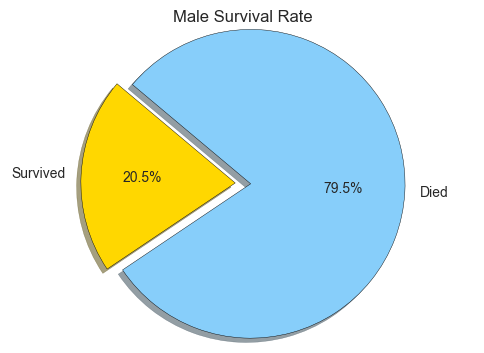

In [38]:
pie_chart('Male Survival Rate', 93, 360, 'Survived', 'Died', 140)

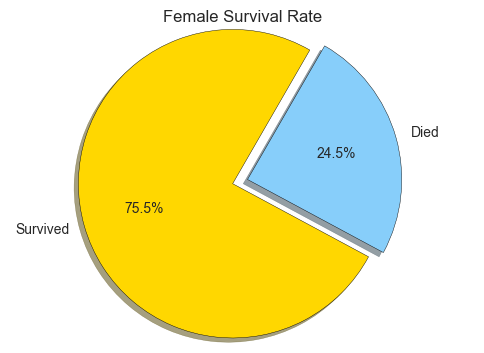

In [39]:
pie_chart('Female Survival Rate', 197, 64, 'Survived', 'Died', 60)

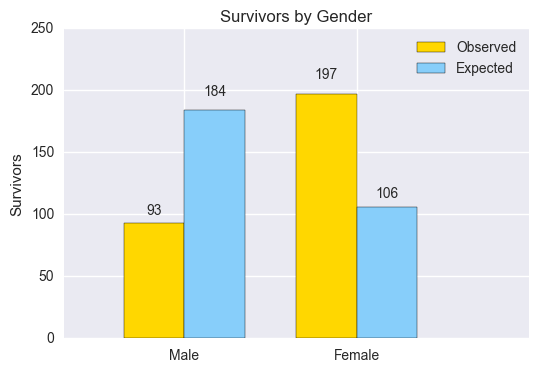

In [40]:
bar_chart(93, 197, 184, 106, 0, 250, 'Survivors by Gender', 'Survivors', 'Male', 'Female')

$$
\chi^2 = \frac{(93 - 184)^2}{184} + \frac{(360 - 269)^2}{269} + \frac{(197 - 106)^2}{106} + \frac{(64 - 155)^2}{155} = 207.3
$$

Using the chi-square critical values table, we find the critical value for 1 degree of freedom and p = 0.05:

$$
\chi^2_{0.05} = 3.841
$$

** Statistical test # 1 conclusion:**
<p>
The chi-square value of 207.3 with 1 degree of freedom is above the critical value of 3.841 at p-value = 0.05.
<p>
**We reject H0. The expected survival rate is not independent from gender. Women had more chance of survival.**

***
### Statistical test #2: Did adulthood influence survival rate?

**Null hypotesis (H0)**: Adults and children had the same chances of survival.<br>
**Alternative hypotesis (H1)**: Adults and children differed in their chances of survival.

**Significance level**: p = 0.05 (5%)

**Degrees of freedom**: (rows - 1) * (columns - 1) = (2 - 1) * (2 - 1) = 1 DF.

**Recapturing our childhood / adulthood assumption:**
    * Adults: > 10 years of age
    * Children: <= 10 years of age

In [46]:
titanic_df_new2.groupby(['Child', 'Survived'])['Total_Passengers'].sum()

Child  Survived
0      0           398
       1           252
1      0            26
       1            38
Name: Total_Passengers, dtype: int64

Beautifying our table of observed values:

| | Observed Survivals | Observed Deaths | Total
| :------------- |:-------:| :-------:|:-------:
| Adult | 252 | 398 | 650
| Child | 38 | 26 | 64
| Total | 290 | 424 | 714

We expect each person aboard to have the same fair chance of surviving no matter its age. 

Expected values:

$$
Expected = \frac{Total_{column} * Total_{Row}}{Total}
$$

| | Expected Survivals | Expected Deaths | Total
| :------------- |:-------:| :-------:|:-------:
| Adult | 264.0 | 386.0 | 650
| Child | 26.0 | 38.0 | 64
| Total | 290 | 424 | 714

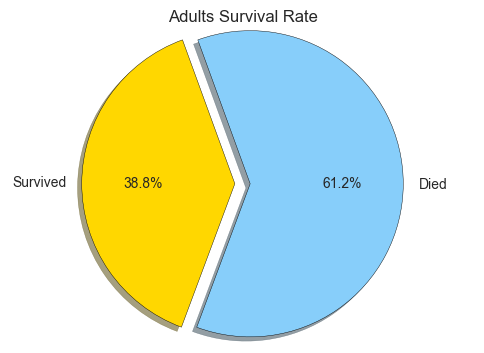

In [47]:
pie_chart('Adults Survival Rate', 252, 398, 'Survived', 'Died', 110)

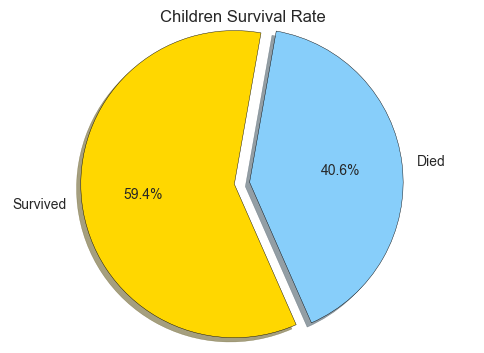

In [48]:
pie_chart('Children Survival Rate', 38, 26, 'Survived', 'Died', 80)

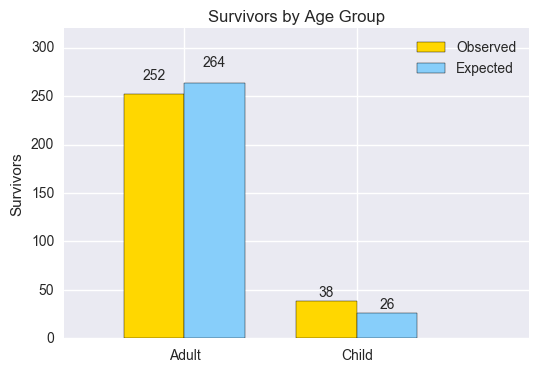

In [49]:
bar_chart(252, 38, 264, 26, 0, 320, 'Survivors by Age Group', 'Survivors', 'Adult', 'Child')

$$
\chi^2 = \frac{(252 - 264)^2}{264} + \frac{(398 - 386)^2}{386} + \frac{(38 - 26)^2}{26} + \frac{(26 - 38)^2}{38} = 10.26
$$

Using the chi-square critical values table, we find the critical value for 1 degree of freedom and p = 0.05:

$$
\chi^2_{0.05} = 3.841
$$

** Statistical test # 2 conclusion:**
<p>
The chi-square value of 10.26 with 1 degree of freedom is above the critical value of 3.841 at p-value = 0.05.
<p>
**We reject H0. The expected survival rate is not independent from age. <br>
Children had more chances of survival: 59.4% for children against 48.8% for adults.**

***
### Statistical test #3: Did family members' survival rate differ from those travelling solo?

**Null hypotesis (H0)**: People travelling in family groups had the same chances of survival as solo travellers.<br>
**Alternative hypotesis (H1)**: Family members and solo travellers differed in their chances of survival.

**Significance level**: p = 0.05 (5%)

**Degrees of freedom**: (rows - 1) * (columns - 1) = (2 - 1) * (2 - 1) = 1 DF.

In [50]:
titanic_df_new2.groupby(['Solo_Traveller', 'Survived'])['Total_Passengers'].sum()

Solo_Traveller  Survived
0               0           153
                1           119
1               0           271
                1           171
Name: Total_Passengers, dtype: int64

Beautifying our table of observed values:

| | Observed Survivals | Observed Deaths | Total
| :------------- |:-------:| :-------:|:-------:
| Family Member | 119 | 153 | 272
| Solo Traveller | 171 | 271 | 442
| Total | 290 | 424 | 714

We expect each person aboard to have the same fair chance of surviving no matter if travelling alone or as a family member. 

Expected values:

$$
Expected = \frac{Total_{column} * Total_{Row}}{Total}
$$

| | Expected Survivals | Expected Deaths | Total
| :------------- |:-------:| :-------:|:-------:
| Family Member | 110.5 | 161.5 | 272
| Solo Traveller | 179.5 | 262.5 | 442
| Total | 290 | 424 | 714

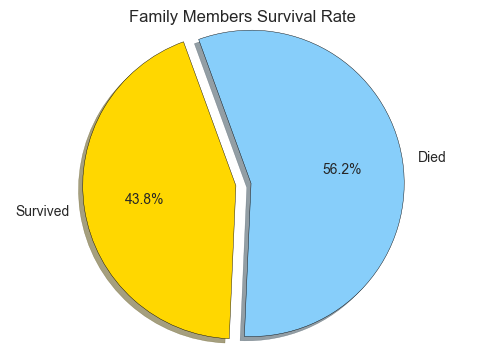

In [51]:
pie_chart('Family Members Survival Rate', 119, 153, 'Survived', 'Died', 110)

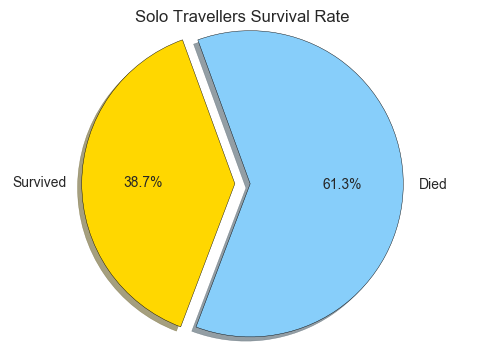

In [52]:
pie_chart('Solo Travellers Survival Rate', 171, 271, 'Survived', 'Died', 110)

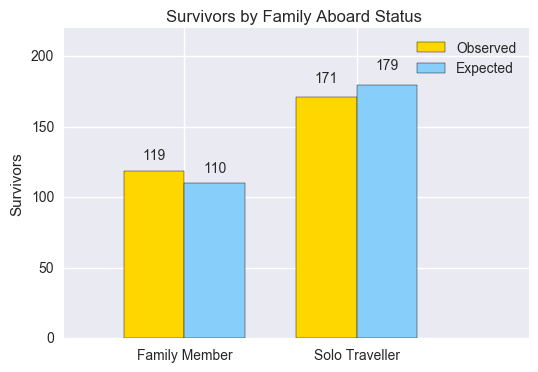

In [53]:
bar_chart(119, 171, 110.5, 179.5, 0, 220, 'Survivors by Family Aboard Status ', 'Survivors', 'Family Member', 'Solo Traveller')

$$
\chi^2 = \frac{(119 - 110.5)^2}{110.5} + \frac{(153 - 161.5)^2}{161.5} + \frac{(171 - 179.5)^2}{179.5} + \frac{(271 - 262.5)^2}{262.5} = 1.79
$$

Using the chi-square critical values table, we find the critical value for 1 degree of freedom and p = 0.05:

$$
\chi^2_{0.05} = 3.841
$$

** Statistical test # 3 conclusion:**
<p>
The chi-square value of 1.79 with 1 degree of freedom is below the critical value of 3.841 at p-value = 0.05.
<p>
**We fail to reject H0. There's no statistical difference between passengers travelling solo and those part of family groups.**

***
### Statistical test #4: Did children presence in a family influence its members survival rate?

**Null hypotesis (H0)**: People travelling as a member of a family with children had the same chances of survival as family memebers with no children among them.<br>
**Alternative hypotesis (H1)**: H0 is false. Childrens presence influence family members survival rate.

**Significance level**: p = 0.05 (5%)

**Degrees of freedom**: (rows - 1) * (columns - 1) = (2 - 1) * (2 - 1) = 1 DF.

In [54]:
titanic_df_families = titanic_df_new2[titanic_df_new2['Solo_Traveller']==0]

titanic_df_families.groupby(['Solo_Traveller', 'Child_Presence', 'Survived'])['Total_Passengers'].sum()

Solo_Traveller  Child_Presence  Survived
0               0               0           94
                                1           71
                1               0           59
                                1           48
Name: Total_Passengers, dtype: int64

Note: 'Solo_Traveller' was just a check. We already filtered families.

Beautifying our table of observed values:

| | Observed Survivals | Observed Deaths | Total
| :------------- |:-------:| :-------:|:-------:
| Members of Families With Children  | 71 | 94 | 165
| Members of Families Without Children | 48 | 59 | 107
| Total | 119 | 153 | 272

We expect each person aboard as part of a family to have the same fair chance of surviving no matter if travelling with or without children. 

Expected values:

$$
Expected = \frac{Total_{column} * Total_{Row}}{Total}
$$

| | Expected Survivals | Expected Deaths | Total
| :------------- |:-------:| :-------:|:-------:
| Members of Families With Children | 72.2 | 92.8 | 165
| Members of Families Without Children | 46.8 | 60.2 | 107
| Total | 119 | 153 | 272

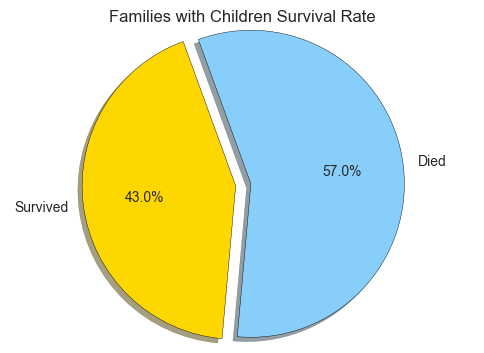

In [55]:
pie_chart('Families with Children Survival Rate', 71, 94, 'Survived', 'Died', 110)

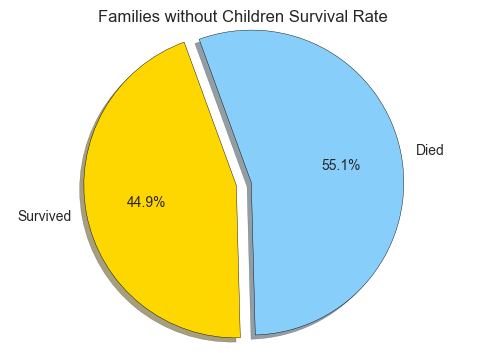

In [56]:
pie_chart('Families without Children Survival Rate', 48, 59, 'Survived', 'Died', 110)

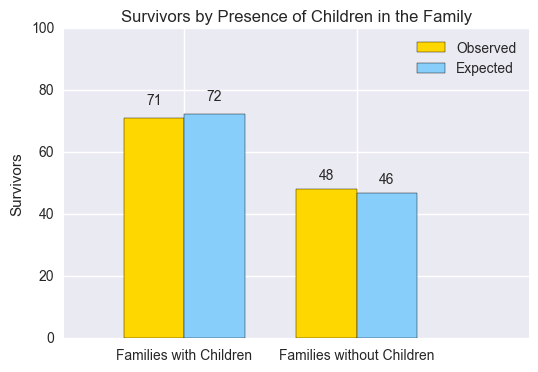

In [57]:
bar_chart(71, 48, 72.2, 46.8, 0, 100, 'Survivors by Presence of Children in the Family', 'Survivors', 'Families with Children', 'Families without Children')

$$
\chi^2 = \frac{(71 - 72.2)^2}{72.2} + \frac{(94 - 92.8)^2}{92.8} + \frac{(48 - 46.8)^2}{46.8} + \frac{(59 - 60.2)^2}{60.2} = 0.09
$$

Using the chi-square critical values table, we find the critical value for 1 degree of freedom and p = 0.05:

$$
\chi^2_{0.05} = 3.841
$$

** Statistical test # 4 conclusion:**
<p>
The chi-square value of 0.09 with 1 degree of freedom is below the critical value of 3.841 at p-value = 0.05.
<p>
**We fail to reject H0. There's no statistical difference between familiy members travelling with children and family members travelling without children.**

## Step 5: Conclusions

The present analisys intended to demonstrate the correlation between the survival rate of passengers and their age, gender and the presence of family members aboard. 
<p>
In those cases where data was found statistically correlated, it's not possible to infer causation. To do so, further research need to be performed, either quantitative or qualitative, which is beyond the scope of the present work.
<p>
Among the analised variables, the highest correlation stands between gender and survival rate. Being a woman aboard raised the person's survival rate to 85.8% above its fair share. Naturally, being a man lowered a person's survival rate accordingly, being 49.5% lower than its fair share. 
<p>
Children chances of survival were slightly higher than adults. Still, statistically significant. The criteria used to define a child was a person 10 years old or below. This criteria was arbitrarily chosen, based not on legal age, but instead on an age cut low enough for others aboard to perceive the child as so. The idea behind it was to raise the issue of if, during actual extreme situations, the "women and children first criteria" was followed. In spite of not proving causation, both this and the previous results raise the need for further investigation in the future.
<p>
On the other hand, the presence of family members aboard did not correlate statistically to survival rate. The presence of a child in a family didn't correlate to survival rate of family members either.
The idea behind the analysis was to raise the question of if solo travellers would be quicker at securing a place in a life boat, or if family members would make an extra effort to 'squeeze' a relative aboard a life boat. 